### Introduction to Deep4Rec

Brief practical introduction to Deep4Rec. We'll show how to load a dataset and train a model.

Check more examples in the [examples folder]()!

- Author: Marianne Linhares Monteiro ([github: mari-linhares](https://github.com/mari-linhares/), [twitter: hereismari](https://twitter.com/hereismari))


First let's import the required dependencies.

In [1]:
import sys

sys.path.append('../../')

import os
# Ignore some tensorflow logs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from matplotlib import pyplot as plt
import tensorflow as tf

/media/store/Documentos/deep4rec/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/media/store/Documentos/deep4rec/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/media/store/Documentos/deep4rec/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/media/store/Documentos/deep4rec/env/lib

Now let's import Deep4Rec.

There are two main modules in deep4rec that you usually are going to use:
    
 * `datasets`: Common datasets used for Recommendation Systems evaluation already preprocessed and ready to be used.
 * `models`: Recommenders based on deep learning.
 
Let's import them.

In [2]:
from deep4rec import datasets
from deep4rec import models

We can choose any dataset listed in the datasets options.

In [3]:
datasets.options()

['frappe', 'ml-100k']

In [4]:
# Build chosen dataset
ds = datasets.build_dataset("ml-100k")

We can choose any model listed in the models options.

In [5]:
models.options()

['FM', 'NeuralFM', 'NeuralMF', 'WideDeep']

Let's start with the FM model.

In [6]:
fm = models.FM(ds, num_units=16)

In order to train a model just call `train`.

In [7]:
BATCH_SIZE = 128
EPOCHS = 10
LR = 0.04

fm.train(
    ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    loss_function="rmse",
    optimizer=tf.train.AdagradOptimizer(learning_rate=LR),
)

  0%|          | 0/10 [00:00<?, ?it/s]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1, Time: 8.892351 (s)


 10%|█         | 1/10 [00:10<01:33, 10.38s/it]

------------ train losses ------------
rmse: 0.976066
------------ test losses ------------
rmse: 1.014348
Epoch 2, Time: 9.447056 (s)


 20%|██        | 2/10 [00:21<01:24, 10.57s/it]

------------ train losses ------------
rmse: 0.946398
------------ test losses ------------
rmse: 0.987880
Epoch 3, Time: 8.764601 (s)


 30%|███       | 3/10 [00:31<01:13, 10.46s/it]

------------ train losses ------------
rmse: 0.934856
------------ test losses ------------
rmse: 0.976743
Epoch 4, Time: 8.998286 (s)


 40%|████      | 4/10 [00:42<01:02, 10.46s/it]

------------ train losses ------------
rmse: 0.928319
------------ test losses ------------
rmse: 0.969957
Epoch 5, Time: 9.494996 (s)


 50%|█████     | 5/10 [00:53<00:53, 10.66s/it]

------------ train losses ------------
rmse: 0.925464
------------ test losses ------------
rmse: 0.966764
Epoch 6, Time: 9.317860 (s)


 60%|██████    | 6/10 [01:04<00:42, 10.71s/it]

------------ train losses ------------
rmse: 0.924321
------------ test losses ------------
rmse: 0.966720
Epoch 7, Time: 9.825822 (s)


 70%|███████   | 7/10 [01:15<00:32, 10.88s/it]

------------ train losses ------------
rmse: 0.919571
------------ test losses ------------
rmse: 0.962208
Epoch 8, Time: 9.285885 (s)


 80%|████████  | 8/10 [01:25<00:21, 10.82s/it]

------------ train losses ------------
rmse: 0.917974
------------ test losses ------------
rmse: 0.961494
Epoch 9, Time: 9.936853 (s)
------------ train losses ------------
rmse: 0.917020


 90%|█████████ | 9/10 [01:37<00:11, 11.03s/it]

------------ test losses ------------
rmse: 0.960879
Epoch 10, Time: 10.380087 (s)


100%|██████████| 10/10 [01:49<00:00, 10.93s/it]

------------ train losses ------------
rmse: 0.916495
------------ test losses ------------
rmse: 0.961017


Let's now try NeuralFM and NeuralMF models and compare them. We just need to add a few lines of code and we're ready to go!

In [8]:
neuralfm = models.NeuralFM(ds,
                     num_units=16,
                     layers=[16, 8],
                     dropout_prob=[0.1, 0.1, 0.1]  # dropout for layer 1, layer 2 and features weights.
                    )

neuralfm.train(
    ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    loss_function="rmse",
    optimizer=tf.train.AdagradOptimizer(learning_rate=LR),
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1, Time: 20.809472 (s)
------------ train losses ------------
rmse: 0.969511


 10%|█         | 1/10 [00:24<03:42, 24.72s/it]

------------ test losses ------------
rmse: 1.005590
Epoch 2, Time: 22.509306 (s)
------------ train losses ------------
rmse: 0.987185


 20%|██        | 2/10 [00:51<03:21, 25.21s/it]

------------ test losses ------------
rmse: 1.020495
Epoch 3, Time: 20.647620 (s)
------------ train losses ------------
rmse: 0.912660


 30%|███       | 3/10 [01:15<02:54, 24.87s/it]

------------ test losses ------------
rmse: 0.963678
Epoch 4, Time: 20.890325 (s)
------------ train losses ------------
rmse: 0.904504


 40%|████      | 4/10 [01:39<02:28, 24.71s/it]

------------ test losses ------------
rmse: 0.962839
Epoch 5, Time: 20.669110 (s)
------------ train losses ------------
rmse: 0.971237


 50%|█████     | 5/10 [02:03<02:02, 24.53s/it]

------------ test losses ------------
rmse: 1.011306
Epoch 6, Time: 21.585359 (s)
------------ train losses ------------
rmse: 0.927864


 60%|██████    | 6/10 [02:28<01:38, 24.67s/it]

------------ test losses ------------
rmse: 0.980690
Epoch 7, Time: 21.969532 (s)
------------ train losses ------------
rmse: 0.877824


 70%|███████   | 7/10 [02:54<01:14, 24.91s/it]

------------ test losses ------------
rmse: 0.953055
Epoch 8, Time: 21.123000 (s)
------------ train losses ------------
rmse: 0.970735


 80%|████████  | 8/10 [03:18<00:49, 24.79s/it]

------------ test losses ------------
rmse: 1.016755
Epoch 9, Time: 21.446664 (s)
------------ train losses ------------
rmse: 0.886346


 90%|█████████ | 9/10 [03:43<00:24, 24.81s/it]

------------ test losses ------------
rmse: 0.967912
Epoch 10, Time: 21.617323 (s)
------------ train losses ------------
rmse: 0.870365


100%|██████████| 10/10 [04:08<00:00, 24.85s/it]

------------ test losses ------------
rmse: 0.949875


All Deep Learning methods have the same interface and parameters so to use NeuralFM instead of NeuralFM we just need to use a different class name.

In [9]:
neuralmf = models.NeuralMF(ds,
                     num_units=16,
                     layers=[16, 8],
                     dropout_prob=[0.1, 0.1, 0.1]  # dropout for layer 1, layer 2 and features weights.
                    )

neuralmf.train(
    ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    loss_function="rmse",
    optimizer=tf.train.AdagradOptimizer(learning_rate=LR),
)

  0%|          | 0/10 [00:00<?, ?it/s]

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
Epoch 1, Time: 22.123694 (s)
------------ train losses ------------
rmse: 0.954131


 10%|█         | 1/10 [00:25<03:51, 25.75s/it]

------------ test losses ------------
rmse: 0.993567
Epoch 2, Time: 23.240404 (s)
------------ train losses ------------
rmse: 0.927601


 20%|██        | 2/10 [00:52<03:29, 26.20s/it]

------------ test losses ------------
rmse: 0.972447
Epoch 3, Time: 23.334316 (s)
------------ train losses ------------
rmse: 0.942561


 30%|███       | 3/10 [01:19<03:04, 26.36s/it]

------------ test losses ------------
rmse: 0.986124
Epoch 4, Time: 23.563688 (s)
------------ train losses ------------
rmse: 0.909679


 40%|████      | 4/10 [01:46<02:39, 26.62s/it]

------------ test losses ------------
rmse: 0.965442
Epoch 5, Time: 21.830985 (s)
------------ train losses ------------
rmse: 0.905915


 50%|█████     | 5/10 [02:12<02:11, 26.21s/it]

------------ test losses ------------
rmse: 0.954952
Epoch 6, Time: 23.026019 (s)
------------ train losses ------------
rmse: 0.891428


 60%|██████    | 6/10 [02:38<01:45, 26.31s/it]

------------ test losses ------------
rmse: 0.951916
Epoch 7, Time: 23.010279 (s)
------------ train losses ------------
rmse: 0.884084


 70%|███████   | 7/10 [03:05<01:19, 26.38s/it]

------------ test losses ------------
rmse: 0.947280
Epoch 8, Time: 22.983920 (s)
------------ train losses ------------
rmse: 0.876009


 80%|████████  | 8/10 [03:31<00:52, 26.41s/it]

------------ test losses ------------
rmse: 0.943867
Epoch 9, Time: 22.920592 (s)
------------ train losses ------------
rmse: 0.876564


 90%|█████████ | 9/10 [03:58<00:26, 26.40s/it]

------------ test losses ------------
rmse: 0.947802
Epoch 10, Time: 25.206844 (s)
------------ train losses ------------
rmse: 0.871766


100%|██████████| 10/10 [04:27<00:00, 26.71s/it]

------------ test losses ------------
rmse: 0.946515


Let's compare the metods. After training a model we can check their losses in each epoch using `model.test_losses` and `model.train_losses` (if we had a validation set we could also use `model.valid_losses`).

In [10]:
# utility function to plot model losses
def plot_losses(model):
    plt.title(type(model).__name__)
    plt.plot([loss["rmse"] for loss in model._losses['test']], label='test')
    plt.plot([loss["rmse"] for loss in model._losses['train']], label='train')
    plt.legend()
    plt.show()

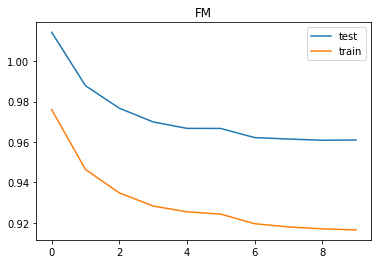

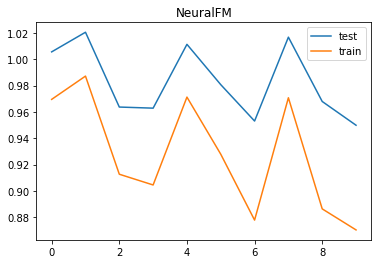

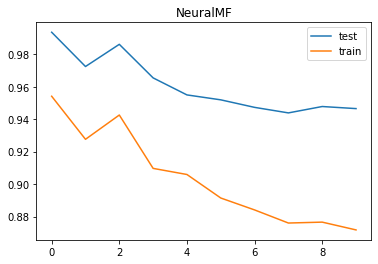

In [11]:
plot_losses(fm); plot_losses(neuralfm); plot_losses(neuralmf)

### What's next?

- Contribute to the code base! Feel free to create a PR with your contributions, if you don't know from where start check the open issues.
- Check the examples folder